In [95]:
# Importo librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

In [96]:
# Importo el archivo
df = pd.read_csv(r'C:\Users\ibergera\Desktop\CS DATOS\TP\dataset_final_carajo_ALDI.csv',delimiter= ';')

In [97]:
# Veo que tiene
df.head()

,key,fecha,hora,co_la_boca,no2_la_boca,pm10_la_boca,fecha-hora,Flujo_en_Sentido_A,Flujo_en_Sentido_B,HORA,TEMP,HUM,PNM,DD,FF
0,0,2019-01-01,1,0.48,10.0,23.0,2019-01-01 1,2397.0,1771.0,1.0,25.9,64.0,1010.6,70.0,19.0
1,1,2019-01-01,2,0.46,11.0,23.0,2019-01-01 2,3013.0,2384.0,2.0,25.4,67.0,1010.4,70.0,19.0
2,2,2019-01-01,3,0.46,12.0,23.0,2019-01-01 3,2098.0,1835.0,3.0,24.7,71.0,1010.5,50.0,20.0
3,3,2019-01-01,4,0.46,11.0,24.0,2019-01-01 4,1165.0,1254.0,4.0,24.1,75.0,1010.2,50.0,17.0
4,4,2019-01-01,5,0.45,9.0,24.0,2019-01-01 5,1176.0,1026.0,5.0,23.7,80.0,1010.8,70.0,17.0


In [98]:
# Dropie una columna al pedo. Es necesario mantener fecha y hora por separados o se pueden dropear?
df_nuevo=df.drop(columns=['key'])

In [99]:
# Nuevo Head
df_nuevo.head()

,fecha,hora,co_la_boca,no2_la_boca,pm10_la_boca,fecha-hora,Flujo_en_Sentido_A,Flujo_en_Sentido_B,HORA,TEMP,HUM,PNM,DD,FF
0,2019-01-01,1,0.48,10.0,23.0,2019-01-01 1,2397.0,1771.0,1.0,25.9,64.0,1010.6,70.0,19.0
1,2019-01-01,2,0.46,11.0,23.0,2019-01-01 2,3013.0,2384.0,2.0,25.4,67.0,1010.4,70.0,19.0
2,2019-01-01,3,0.46,12.0,23.0,2019-01-01 3,2098.0,1835.0,3.0,24.7,71.0,1010.5,50.0,20.0
3,2019-01-01,4,0.46,11.0,24.0,2019-01-01 4,1165.0,1254.0,4.0,24.1,75.0,1010.2,50.0,17.0
4,2019-01-01,5,0.45,9.0,24.0,2019-01-01 5,1176.0,1026.0,5.0,23.7,80.0,1010.8,70.0,17.0


In [100]:
#Observamos cuales son las columnas de nuestro dataset
df.columns

Index(['key', 'fecha', 'hora', 'co_la_boca', 'no2_la_boca', 'pm10_la_boca',
       'fecha-hora', 'Flujo_en_Sentido_A', 'Flujo_en_Sentido_B', 'HORA',
       'TEMP', 'HUM', 'PNM', 'DD', 'FF'],
      dtype='object')

In [101]:
#Describimos el dataset
df.describe()

,key,hora,co_la_boca,no2_la_boca,pm10_la_boca,Flujo_en_Sentido_A,Flujo_en_Sentido_B,HORA,TEMP,HUM,PNM,DD,FF
count,2868.000000,2868.000000,2805.000000,2464.000000,2697.000000,2325.000000,2325.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000
mean,1433.500000,12.474895,0.468927,20.132305,29.770115,2344.350538,2583.639570,12.468739,22.159523,69.451391,1014.854174,173.335743,13.704373
std,828.064611,6.923348,0.199410,8.194223,9.092410,1222.365135,1345.677537,6.921600,4.095410,13.972590,5.931238,120.597019,6.730538
min,0.000000,1.000000,0.160000,1.000000,9.000000,0.000000,0.000000,1.000000,11.800000,20.000000,998.000000,0.000000,0.000000
25%,716.750000,6.000000,0.350000,15.000000,23.000000,1347.000000,1332.000000,6.000000,19.200000,60.000000,1010.800000,90.000000,9.000000
50%,1433.500000,12.000000,0.440000,20.000000,29.000000,2489.000000,2825.000000,12.000000,22.000000,70.000000,1014.500000,140.000000,13.000000
75%,2150.250000,18.000000,0.550000,25.000000,35.000000,3291.000000,3624.000000,18.000000,24.900000,80.000000,1019.050000,230.000000,17.000000
max,2867.000000,24.000000,2.980000,75.000000,62.000000,4982.000000,5342.000000,24.000000,35.000000,98.000000,1029.600000,990.000000,48.000000


In [102]:
df_nuevo.shape

(2868, 14)

In [103]:
# Veo si hay Nulls
col_nulls = df_nuevo.isnull().any()
col_nulls

fecha                 False
hora                  False
co_la_boca             True
no2_la_boca            True
pm10_la_boca           True
fecha-hora            False
Flujo_en_Sentido_A     True
Flujo_en_Sentido_B     True
HORA                   True
TEMP                   True
HUM                    True
PNM                    True
DD                     True
FF                     True
dtype: bool

In [104]:
# Veo cuantos nulls
total_nulas = df_nuevo.isnull().sum().sort_values(ascending=False)
porcentaje = (df_nuevo.isnull().sum()/df_nuevo.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_nulas, porcentaje], axis=1, keys=['total', 'porcentaje'])
missing_data.head(6)

,total,porcentaje
Flujo_en_Sentido_B,543,0.189331
Flujo_en_Sentido_A,543,0.189331
no2_la_boca,404,0.140865
pm10_la_boca,171,0.059623
FF,101,0.035216
DD,101,0.035216


In [105]:
#Dropeo los nulls
df_nuevo.dropna(how ='any', inplace = True)

In [106]:
#Veo cuantas lineas perdí
df_nuevo.shape

(1897, 14)

In [107]:
df_nuevo.head

<bound method NDFrame.head of            fecha  hora  co_la_boca  no2_la_boca  pm10_la_boca     fecha-hora  \
0     2019-01-01     1        0.48         10.0          23.0   2019-01-01 1   
1     2019-01-01     2        0.46         11.0          23.0   2019-01-01 2   
2     2019-01-01     3        0.46         12.0          23.0   2019-01-01 3   
3     2019-01-01     4        0.46         11.0          24.0   2019-01-01 4   
4     2019-01-01     5        0.45          9.0          24.0   2019-01-01 5   
5     2019-01-01     6        0.44          8.0          24.0   2019-01-01 6   
6     2019-01-01     7        0.44          9.0          25.0   2019-01-01 7   
7     2019-01-01     8        0.42          9.0          24.0   2019-01-01 8   
8     2019-01-01     9        0.43          8.0          24.0   2019-01-01 9   
9     2019-01-01    10        0.43          8.0          24.0  2019-01-01 10   
10    2019-01-01    11        0.44          5.0          23.0  2019-01-01 11   
11    2019

In [108]:
# Cambio las variables a FLOAT
df_nuevo['no2_la_boca'] = df_nuevo['no2_la_boca'].astype(float)
df_nuevo['pm10_la_boca'] = df_nuevo['pm10_la_boca'].astype(float)
df_nuevo['co_la_boca'] = df_nuevo['co_la_boca'].astype(float)

In [109]:
# Por si acaso veo si quedo algun nulo
df_nuevo.isnull().any()

fecha                 False
hora                  False
co_la_boca            False
no2_la_boca           False
pm10_la_boca          False
fecha-hora            False
Flujo_en_Sentido_A    False
Flujo_en_Sentido_B    False
HORA                  False
TEMP                  False
HUM                   False
PNM                   False
DD                    False
FF                    False
dtype: bool

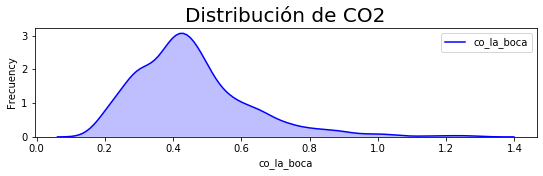

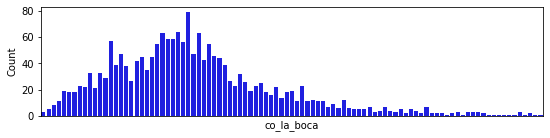

In [110]:
plt.figure(figsize=(9,2))
sns.kdeplot(df_nuevo.co_la_boca, color="Blue", shade = True)
plt.xlabel("co_la_boca")
plt.ylabel("Frecuency")
plt.title('Distribución de CO2',size = 20)
plt.show()

plt.figure(figsize=(9,2))
sns.countplot(df_nuevo.co_la_boca, color="Blue")
plt.xlabel("co_la_boca")
plt.ylabel("Count")
plt.xticks([])
plt.show()

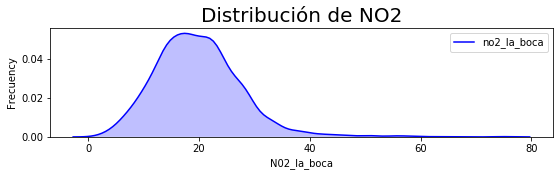

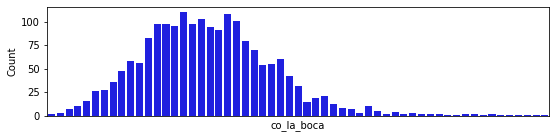

In [111]:
plt.figure(figsize=(9,2))
sns.kdeplot(df_nuevo.no2_la_boca, color="Blue", shade = True)
plt.xlabel("N02_la_boca")
plt.ylabel("Frecuency")
plt.title('Distribución de NO2',size = 20)
plt.show()

plt.figure(figsize=(9,2))
sns.countplot(df_nuevo.no2_la_boca, color="Blue")
plt.xlabel("co_la_boca")
plt.ylabel("Count")
plt.xticks([])
plt.show()

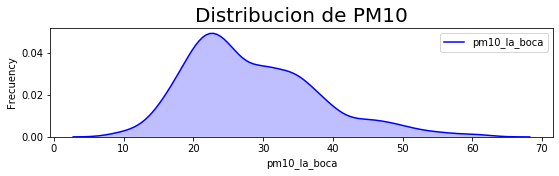

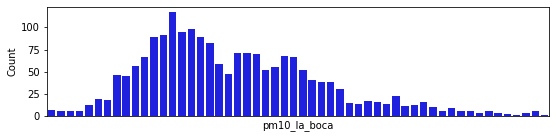

In [118]:
plt.figure(figsize=(9,2))
sns.kdeplot(df_nuevo.pm10_la_boca, color="Blue", shade = True)
plt.xlabel("pm10_la_boca")
plt.ylabel("Frecuency")
plt.title('Distribucion de PM10',size = 20)
plt.show()

plt.figure(figsize=(9,2))
sns.countplot(df_nuevo.pm10_la_boca, color="Blue")
plt.xlabel("pm10_la_boca")
plt.ylabel("Count")
plt.xticks([])
plt.show()

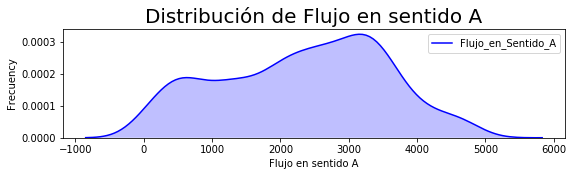

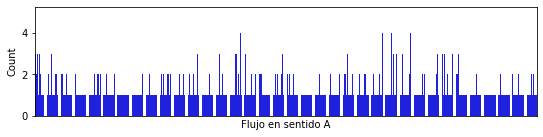

In [119]:
plt.figure(figsize=(9,2))
sns.kdeplot(df_nuevo.Flujo_en_Sentido_A, color="Blue", shade = True)
plt.xlabel("Flujo en sentido A")
plt.ylabel("Frecuency")
plt.title('Distribución de Flujo en sentido A',size = 20)
plt.show()

plt.figure(figsize=(9,2))
sns.countplot(df_nuevo.Flujo_en_Sentido_A, color="Blue")
plt.xlabel("Flujo en sentido A")
plt.ylabel("Count")
plt.xticks([])
plt.show()

In [80]:
percentil_90 = df_nuevo['co_la_boca'].quantile(0.95)

In [81]:
percentil_90

0.78